In [29]:
import asyncio
import numpy
from matplotlib import pyplot as plt

def get_average_of_runs(runs):
    return numpy.average(runs, 0)

def get_optimal_reward(bandit):
    optimal_reward = max(list(map(lambda lever: lever[0](), bandit)))
    return optimal_reward

n = 10




async def plot_optimality_of_agent(agent, bandit_function, refresh_reward_every_step=False, run_count=2000):
    await plot_optimality_of_agents([agent], ["agent"], bandit_function, refresh_reward_every_step, run_count)

async def plot_optimality_of_agents(agents, labels, bandit_function, refresh_reward_every_step=False, run_count=2000):
    for label, agent in zip(labels, agents):
        async def do_bandit_run():
            bandit = bandit_function(n)
            optimal_reward = get_optimal_reward(bandit)

            rewards = []

            total_rewards = 0
            total_optimal_rewards = 0

            for step in range(1, 1000):
                reward, action = agent.step(bandit)
                total_rewards += reward

                if refresh_reward_every_step:
                    optimal_reward = get_optimal_reward(bandit)
                total_optimal_rewards += optimal_reward
                if optimal_reward == 0:
                    rewards.append(1.0)
                else:
                    rewards.append(total_rewards / total_optimal_rewards)

            return rewards
        runs = await asyncio.gather(*[do_bandit_run() for _ in range(run_count)])

        plt.plot(get_average_of_runs(runs), label=label)
    plt.ylabel("% of optimal reward")
    plt.ylim(0, 1)
    plt.legend(loc="lower right")
    plt.show()

## Stationary 10-armed bandit

This demonstrates the efficacy of two different types of agents in a multi-armed bandit environment.



In [2]:
from nbandit.agent import EpsilonGreedySampleAveragesAgent, SoftmaxAgent
from nbandit.bandit import generate_bandit

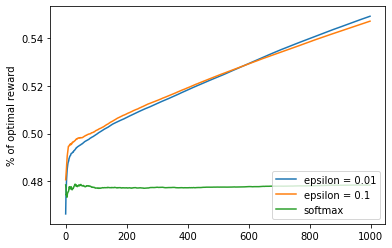

In [5]:
epsilon_greedy_small_e = EpsilonGreedySampleAveragesAgent(n, 0.01)
epsilon_greedy_large_e = EpsilonGreedySampleAveragesAgent(n, 0.1)
softmax_agent = SoftmaxAgent(n)

await plot_optimality_of_agents([epsilon_greedy_small_e, epsilon_greedy_large_e, softmax_agent], ["epsilon = 0.01", "epsilon = 0.1", "softmax"], generate_bandit, False, 2000)

## Nonstationary 10 armed bandit


In [21]:
from nbandit.bandit import generate_nonstationary_bandit
from nbandit.agent import EpsilonGreedyConstantStepSize


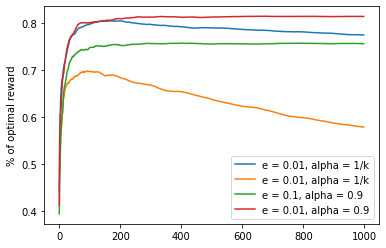

In [24]:
agent1 = EpsilonGreedySampleAveragesAgent(n, 0.01)
agent2 = EpsilonGreedySampleAveragesAgent(n, 0.1)
agent3 = EpsilonGreedyConstantStepSize(n, 0.1, 0.9)
agent4 = EpsilonGreedyConstantStepSize(n, 0.01, 0.9)


await plot_optimality_of_agents([
    agent1, agent2, agent3, agent4
], [
    "e = 0.01, alpha = 1/k",
    "e = 0.01, alpha = 1/k",
    "e = 0.1, alpha = 0.9",
    "e = 0.01, alpha = 0.9",
], generate_nonstationary_bandit, True, 100)

## Reinforcement comparison method


In [7]:
from nbandit.agent import ReinforcementComparisonAgent

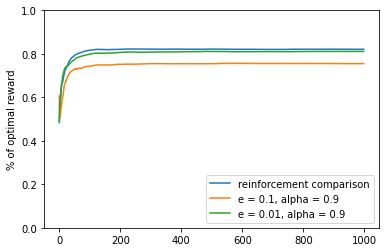

In [31]:
reinforcement_comparison_agent = ReinforcementComparisonAgent(n, 0.1, 0.1)
epsilon_greedy_small_e = EpsilonGreedyConstantStepSize(n, 0.01, 0.9)
epsilon_greedy_large_e = EpsilonGreedyConstantStepSize(n, 0.1, 0.9)


await plot_optimality_of_agents([
    reinforcement_comparison_agent, epsilon_greedy_large_e, epsilon_greedy_small_e
], [
    "reinforcement comparison",
    "e = 0.1, alpha = 0.9",
    "e = 0.01, alpha = 0.9"
], generate_nonstationary_bandit, True, 100)

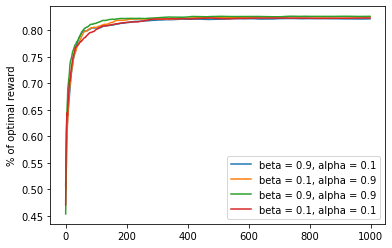

In [17]:
agent1 = ReinforcementComparisonAgent(n, beta=0.9, alpha=0.1)
agent2 = ReinforcementComparisonAgent(n, beta=0.1, alpha=0.9)
agent3 = ReinforcementComparisonAgent(n, beta=0.9, alpha=0.9)
agent4 = ReinforcementComparisonAgent(n, beta=0.1, alpha=0.1)


await plot_optimality_of_agents([
    agent1, agent2, agent3, agent4
], [
    "beta = 0.9, alpha = 0.1",
    "beta = 0.1, alpha = 0.9",
    "beta = 0.9, alpha = 0.9",
    "beta = 0.1, alpha = 0.1"
], generate_nonstationary_bandit, True, 100)

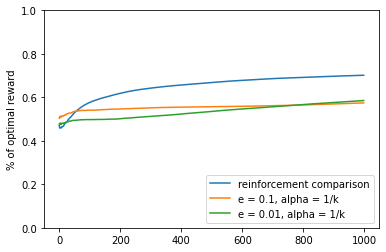

In [30]:
reinforcement_comparison_agent = ReinforcementComparisonAgent(n, beta=0.1, alpha=0.1)
epsilon_greedy_small_e = EpsilonGreedySampleAveragesAgent(n, 0.01)
epsilon_greedy_large_e = EpsilonGreedySampleAveragesAgent(n, 0.1)


await plot_optimality_of_agents([
    reinforcement_comparison_agent, epsilon_greedy_large_e, epsilon_greedy_small_e
], [
    "reinforcement comparison",
    "e = 0.1, alpha = 1/k",
    "e = 0.01, alpha = 1/k"
], generate_bandit, False, 100)